# Homework 4 - Part 2

## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

Go see the other notebook for this question.

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).

2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### 2.1 Load the data
We need to load the data using the scikit-learn library.

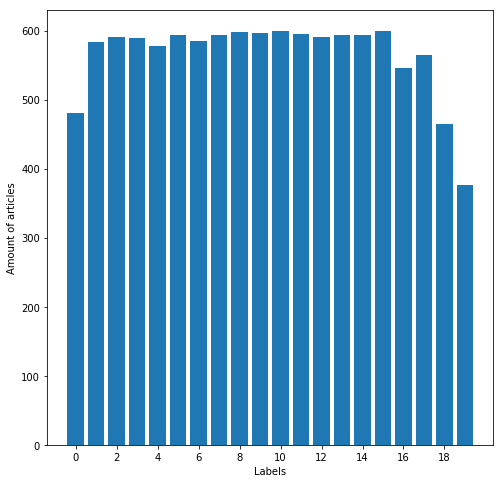

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroup_data = fetch_20newsgroups()

df = pd.DataFrame({'text': newsgroup_data.data, 'label': newsgroup_data.target}).sort_values(by='label')
df['label'] = df['label'].astype('category')
df.reset_index(drop=True, inplace=True)

groups = df.groupby(['label']).agg(['count'])

plt.figure(figsize=[8, 8])
plt.bar(groups.index, groups.values)
plt.xticks(range(0, 20, 2))
plt.xlabel("Labels")
plt.ylabel("Amount of articles")
plt.show()

We can see that each category is well represented in an equal amount. Therefore, we do not need to be too careful about sampling the data, as each category will be well represented on average.

We now split the data among the three groups to test for accuracy of our model.

In [3]:
newsgroup_train = df.sample(frac=0.8)
newsgroup_test = df.drop(newsgroup_train.index).sample(frac=0.5)
newsgroup_valid = df.drop(newsgroup_train.index).drop(newsgroup_test.index)

"Sizes: {train: %d, validation: %d, test: %d}" % (newsgroup_train.size, newsgroup_valid.size, newsgroup_test.size)

'Sizes: {train: 18102, validation: 2262, test: 2264}'

### 2.2 Construct the features
We use the `TfidfVectorizer` to construct features from the texts.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', strip_accents='unicode')

In [5]:
y_train = newsgroup_train['label']
X_train = tfidf.fit_transform(newsgroup_train['text'])
y_valid = newsgroup_valid['label']
X_valid = tfidf.transform(newsgroup_valid['text'])
y_test = newsgroup_test['label']
X_test = tfidf.transform(newsgroup_test['text'])

### 2.3 Determine best parameters

We do a manual grid search to test for the best parameters for our data. We store each found accuracy in a matrix and store the parameters for the best accuracy to be used as our model.

In [6]:
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

depth_range = [2, 5, 10, 20, 35, 50, 75, 100, 125, 150, 200, 300, 400, 500]
n_est_range = [1, 2, 5, 10, 20, 30, 50, 100, 125, 150, 200, 300]

acc_results = np.zeros([len(depth_range), len(n_est_range)])

highest_accuracy = -1.0
highest_depth = 0
highest_n_est = 0
highest_rf = None

for depth, n_est in itertools.product(depth_range, n_est_range):
    print("Training random forests for max_depth=%d and n_estimators=%d" % (depth, n_est))
    random_forests = RandomForestClassifier(max_depth=depth, n_estimators=n_est, n_jobs=-1)
    random_forests.fit(X_train, y_train)
    
    print("  Evaluating performance...")
    pred = random_forests.predict(X_valid)
    accuracy = accuracy_score(y_valid, pred)
    
    print("  accuracy=%f.2" % accuracy)
    
    # Store accuracy results
    i = depth_range.index(depth)
    j = n_est_range.index(n_est)
    acc_results[i][j] = accuracy
    
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        highest_depth = depth
        highest_n_est = n_est
        highest_rf = random_forests

Training random forests for max_depth=2 and n_estimators=1
  Evaluating performance...
  accuracy=0.064545.2
Training random forests for max_depth=2 and n_estimators=2
  Evaluating performance...
  accuracy=0.071618.2
Training random forests for max_depth=2 and n_estimators=5
  Evaluating performance...
  accuracy=0.099912.2
Training random forests for max_depth=2 and n_estimators=10
  Evaluating performance...
  accuracy=0.186561.2
Training random forests for max_depth=2 and n_estimators=20
  Evaluating performance...
  accuracy=0.240495.2
Training random forests for max_depth=2 and n_estimators=30
  Evaluating performance...
  accuracy=0.304156.2
Training random forests for max_depth=2 and n_estimators=50
  Evaluating performance...
  accuracy=0.381079.2
Training random forests for max_depth=2 and n_estimators=100
  Evaluating performance...
  accuracy=0.472149.2
Training random forests for max_depth=2 and n_estimators=125
  Evaluating performance...
  accuracy=0.492485.2
Training ra

  Evaluating performance...
  accuracy=0.585323.2
Training random forests for max_depth=75 and n_estimators=10
  Evaluating performance...
  accuracy=0.717065.2
Training random forests for max_depth=75 and n_estimators=20
  Evaluating performance...
  accuracy=0.774536.2
Training random forests for max_depth=75 and n_estimators=30
  Evaluating performance...
  accuracy=0.809903.2
Training random forests for max_depth=75 and n_estimators=50
  Evaluating performance...
  accuracy=0.829355.2
Training random forests for max_depth=75 and n_estimators=100
  Evaluating performance...
  accuracy=0.849691.2
Training random forests for max_depth=75 and n_estimators=125
  Evaluating performance...
  accuracy=0.848806.2
Training random forests for max_depth=75 and n_estimators=150
  Evaluating performance...
  accuracy=0.843501.2
Training random forests for max_depth=75 and n_estimators=200
  Evaluating performance...
  accuracy=0.861185.2
Training random forests for max_depth=75 and n_estimators=

  Evaluating performance...
  accuracy=0.801945.2
Training random forests for max_depth=400 and n_estimators=30
  Evaluating performance...
  accuracy=0.837312.2
Training random forests for max_depth=400 and n_estimators=50
  Evaluating performance...
  accuracy=0.845270.2
Training random forests for max_depth=400 and n_estimators=100
  Evaluating performance...
  accuracy=0.854111.2
Training random forests for max_depth=400 and n_estimators=125
  Evaluating performance...
  accuracy=0.868258.2
Training random forests for max_depth=400 and n_estimators=150
  Evaluating performance...
  accuracy=0.866490.2
Training random forests for max_depth=400 and n_estimators=200
  Evaluating performance...
  accuracy=0.869142.2
Training random forests for max_depth=400 and n_estimators=300
  Evaluating performance...
  accuracy=0.871795.2
Training random forests for max_depth=500 and n_estimators=1
  Evaluating performance...
  accuracy=0.441202.2
Training random forests for max_depth=500 and n_es

In [7]:
"Highest accuracy of %f.2 was achieved with parameters max_depth=%d and n_estimators=%d" % (highest_accuracy, highest_depth, highest_n_est)

'Highest accuracy of 0.876216.2 was achieved with parameters max_depth=500 and n_estimators=300'

### 2.4 Displaying the accuracy matrix

We want to visualize the results of the above execution by displaying the matrix to determine which parameters yield the better results. We can see that we do not yet tend to overfit: the results always get better.

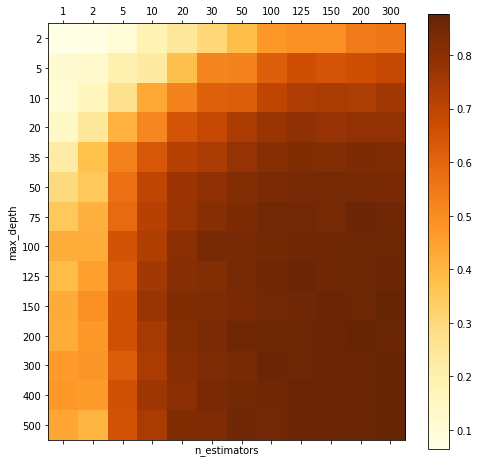

In [8]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
cax = ax.matshow(acc_results, interpolation=None, cmap='YlOrBr')
plt.xlabel("n_estimators", verticalalignment="top")
plt.ylabel("max_depth")
fig.colorbar(cax)
plt.xticks(range(len(n_est_range)), n_est_range)
plt.yticks(range(len(depth_range)), depth_range)
plt.show()

### 2.5 Displaying most important features

We want to visualize which features are the most important for the random forest algorithm.

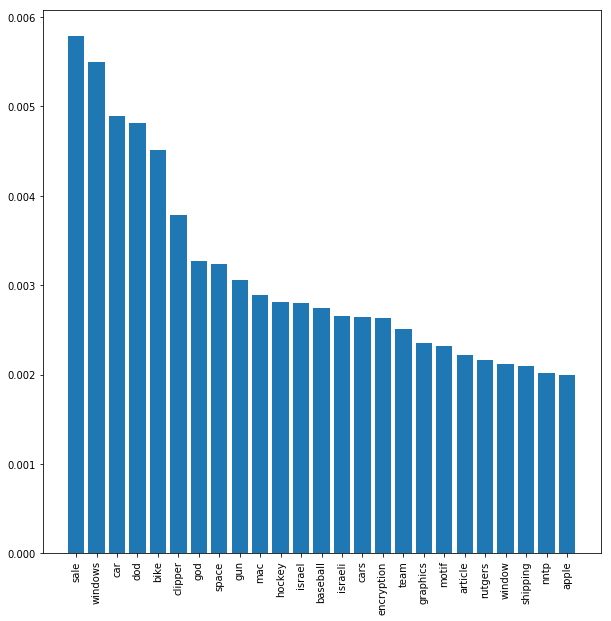

In [9]:
feature_names = tfidf.get_feature_names()
feature_importances = highest_rf.feature_importances_

sorted_features = [(x,y) for y,x in sorted(zip(feature_importances, feature_names), reverse=True)]
best_features = sorted_features[:25]

plt.figure(figsize=[10,10])
plt.bar(range(len(best_features)), [b for a,b in best_features])
plt.xticks(range(len(best_features)), [label for label, _ in best_features], rotation=90)
plt.show()

### 2.6 Confusion Matrix



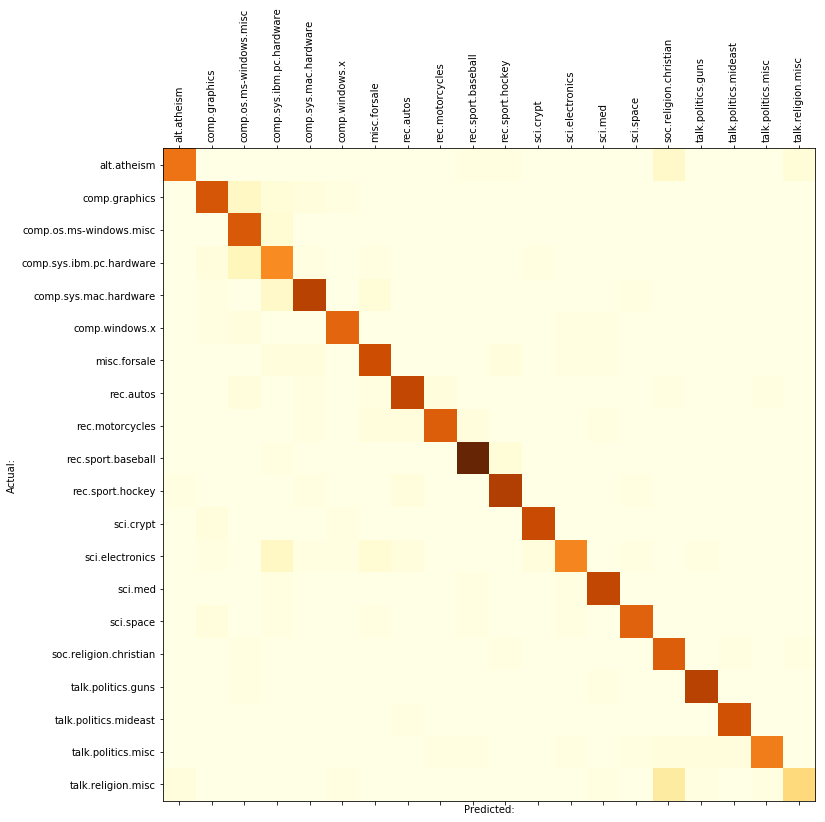

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = highest_rf.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf = cf / y_test.size

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111)
cax = ax.matshow(cf, interpolation=None, cmap='YlOrBr')
plt.xlabel("Predicted:")
plt.ylabel("Actual:")
plt.xticks(range(len(newsgroup_data.target_names)), newsgroup_data.target_names, rotation=90)
plt.yticks(range(len(newsgroup_data.target_names)), newsgroup_data.target_names)
plt.show()

From the confusion matrix, we can see that discussions about religion are often not correctly recognized. Talks about Christianity are most often confused for talks about miscellaneous religion, which is not too far off. We also see that discussions about electronics get detected as "For Sale" which could be in fact correct, as someone may sell his electronics via discussions. 

We rarely see mispredictions that are completely off.